In [446]:
# @title
from IPython.display import Image, display

# Display the image with a specified width and height
display(Image(url="https://img-cdn.thepublive.com/entrackr/media/post_attachments/wp-content/uploads/2018/06/Ola_Revenue_image.gif", width=1500, height=700))


#OLA ENSEMBLE LEARNING<br>
##Analyzed by Shama Bansal

![](https://img-cdn.thepublive.com/entrackr/media/post_attachments/wp-content/uploads/2018/06/Ola_Revenue_image.gif)

## Problem Statement

Ola, a leading ride-hailing company, faces a significant challenge in retaining its drivers. High attrition rates among drivers lead to increased recruitment costs, lowered driver morale, and operational inefficiencies. Since drivers can easily switch to competitors, such as Uber, depending on pay rates or incentives, reducing driver churn has become a critical business concern.

The cost of acquiring new drivers is significantly higher than retaining existing ones, making it essential to identify patterns and factors that influence driver attrition. By predicting which drivers are likely to leave, Ola can implement targeted interventions to improve retention, enhance driver satisfaction, and ultimately reduce costs.

This project aims to build a predictive model to identify drivers at risk of leaving the company. Using demographic, performance, and tenure-related data, the model will help Ola take preemptive measures to reduce attrition and improve driver engagement.

Key objectives include:
1. Identifying the key factors contributing to driver attrition.
2. Predicting the likelihood of a driver leaving based on historical data.
3. Providing actionable insights and recommendations to help Ola retain its drivers.

The model will utilize advanced machine learning techniques, including ensemble learning methods like Bagging and Boosting, to ensure high prediction accuracy. Additionally, it will address class imbalance issues inherent in the dataset, as only a subset of drivers are likely to leave, while the majority will remain.


In [447]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import plotly.graph_objects as go


from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [448]:
!gdown 1cm0gdTtymY8vwzru7YtSWJrfDP7A-bnf

Downloading...
From: https://drive.google.com/uc?id=1cm0gdTtymY8vwzru7YtSWJrfDP7A-bnf
To: /content/ola_driver_scaler.csv
100% 1.13M/1.13M [00:00<00:00, 134MB/s]


In [449]:
df=pd.read_csv('ola_driver_scaler.csv')
df.head()

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


## **Column Profiling:**

MMM-YY : Reporting Date (Monthly)<br>
Driver_ID : Unique id for drivers<br>
Age : Age of the driver<br>
Gender : Gender of the driver – Male : 0, Female: 1<br>
City : City Code of the driver<br>
Education_Level : Education level – 0 for 10+ ,1 for 12+ ,2 for graduate<br>
Income : Monthly average Income of the driver<br>
Date Of Joining : Joining date for the driver<br>
LastWorkingDate : Last date of working for the driver<br>
Joining Designation : Designation of the driver at the time of joining<br>
Grade : Grade of the driver at the time of Reporting<br>
Total Business Value : The total business value acquired by the driver in a month (negative business indicates cancellation/refund or car EMI adjustments)<br>
Quarterly Rating : Quarterly rating of the driver: 1,2,3,4,5 (higher is better)
<br>

In [450]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            19104 non-null  int64  
 1   MMM-YY                19104 non-null  object 
 2   Driver_ID             19104 non-null  int64  
 3   Age                   19043 non-null  float64
 4   Gender                19052 non-null  float64
 5   City                  19104 non-null  object 
 6   Education_Level       19104 non-null  int64  
 7   Income                19104 non-null  int64  
 8   Dateofjoining         19104 non-null  object 
 9   LastWorkingDate       1616 non-null   object 
 10  Joining Designation   19104 non-null  int64  
 11  Grade                 19104 non-null  int64  
 12  Total Business Value  19104 non-null  int64  
 13  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 2.0+ MB


In [451]:
df.nunique()

,0
Unnamed: 0,19104
MMM-YY,24
Driver_ID,2381
Age,36
Gender,2
City,29
Education_Level,3
Income,2383
Dateofjoining,869
LastWorkingDate,493


In [452]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [453]:
df['Dateofjoining']=pd.to_datetime(df['Dateofjoining'])
df['MMM-YY']=pd.to_datetime(df['MMM-YY'])
df['LastWorkingDate']=pd.to_datetime(df['LastWorkingDate'],errors='coerce')
df.rename(columns={'MMM-YY':'Reporting_month'},inplace=True)


In [454]:
df.isna().sum()/len(df)*100

,0
Reporting_month,0.000000
Driver_ID,0.000000
Age,0.319305
Gender,0.272194
City,0.000000
Education_Level,0.000000
Income,0.000000
Dateofjoining,0.000000
LastWorkingDate,91.541039
Joining Designation,0.000000


# KNN Imputation

In [455]:
def highlight_row(row, highlight_index):
    return ['background-color: red' if row.name in highlight_index else '' for _ in range(len(dff.columns))]

# Wrapper function that applies the highlight with a dynamic index
def apply_highlight(dff, highlight_index):
    return dff.style.apply(lambda row: highlight_row(row, highlight_index), axis=1)

In [456]:
num_vars = df.select_dtypes(np.number)

num_vars.columns
imputer = KNNImputer()
imputer.fit(num_vars)
data_new = imputer.transform(num_vars)
data_new = pd.DataFrame(data_new)
data_new.columns = num_vars.columns
data_new.isnull().sum()

,0
Driver_ID,0
Age,0
Gender,0
Education_Level,0
Income,0
Joining Designation,0
Grade,0
Total Business Value,0
Quarterly Rating,0


In [457]:
dff=data_new[data_new['Driver_ID']==541]

# Specify the row index dynamically (e.g., 3618)
highlighted_df = apply_highlight(dff, [3618,3627])
highlighted_df

,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
3614,541.000000,26.000000,0.000000,2.000000,71812.000000,1.000000,2.000000,0.000000,1.000000
3615,541.000000,26.000000,0.000000,2.000000,71812.000000,1.000000,2.000000,272170.000000,1.000000
3616,541.000000,26.000000,0.000000,2.000000,71812.000000,1.000000,2.000000,385400.000000,1.000000
3617,541.000000,26.000000,0.000000,2.000000,71812.000000,1.000000,2.000000,50000.000000,1.000000
3618,541.000000,34.400000,0.000000,2.000000,71812.000000,1.000000,2.000000,104380.000000,1.000000
3619,541.000000,26.000000,0.000000,2.000000,71812.000000,1.000000,2.000000,0.000000,1.000000
3620,541.000000,26.000000,0.000000,2.000000,71812.000000,1.000000,2.000000,210210.000000,2.000000
3621,541.000000,26.000000,0.000000,2.000000,71812.000000,1.000000,2.000000,41000.000000,2.000000
3622,541.000000,27.000000,0.000000,2.000000,71812.000000,1.000000,2.000000,601820.000000,2.000000
3623,541.000000,27.000000,0.000000,2.000000,71812.000000,1.000000,2.000000,200000.000000,2.000000


In [458]:
stndscaler=StandardScaler()
stndscaler.fit(num_vars)
data_new_scaled=stndscaler.transform(num_vars)
data_new_scaled=pd.DataFrame(data_new_scaled,columns=num_vars.columns)
data_new_scaled.head()

,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,-1.744935,-1.065629,-0.848779,1.222688,-0.267358,-0.825051,-1.220348,1.603674,-0.008812
1,-1.744935,-1.065629,-0.848779,1.222688,-0.267358,-0.825051,-1.220348,-1.096482,-0.008812
2,-1.744935,-1.065629,-0.848779,1.222688,-0.267358,-0.825051,-1.220348,-0.506666,-0.008812
3,-1.743702,-0.586223,-0.848779,1.222688,0.044122,0.369747,-0.246150,-0.506666,-0.999102
4,-1.743702,-0.586223,-0.848779,1.222688,0.044122,0.369747,-0.246150,-0.506666,-0.999102


In [459]:
impt=KNNImputer()
data_new_scaled=impt.fit_transform(data_new_scaled)
data_new_scaled=pd.DataFrame(data_new_scaled,columns=num_vars.columns)

dff=data_new_scaled.iloc[3615:3630]


# Specify the row index dynamically (e.g., 3618)
highlighted_df = apply_highlight(dff, [3618,3627])
highlighted_df

,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
3615,-1.078831,-1.385232,-0.848779,1.222688,0.199264,-0.825051,-0.246150,-0.265441,-0.999102
3616,-1.078831,-1.385232,-0.848779,1.222688,0.199264,-0.825051,-0.246150,-0.165085,-0.999102
3617,-1.078831,-1.385232,-0.848779,1.222688,0.199264,-0.825051,-0.246150,-0.462351,-0.999102
3618,-1.078831,-1.321312,-0.848779,1.222688,0.199264,-0.825051,-0.246150,-0.414153,-0.999102
3619,-1.078831,-1.385232,-0.848779,1.222688,0.199264,-0.825051,-0.246150,-0.506666,-0.999102
3620,-1.078831,-1.385232,-0.848779,1.222688,0.199264,-0.825051,-0.246150,-0.320356,-0.008812
3621,-1.078831,-1.385232,-0.848779,1.222688,0.199264,-0.825051,-0.246150,-0.470327,-0.008812
3622,-1.078831,-1.225431,-0.848779,1.222688,0.199264,-0.825051,-0.246150,0.026729,-0.008812
3623,-1.078831,-1.225431,-0.848779,1.222688,0.199264,-0.825051,-0.246150,-0.329405,-0.008812
3624,-1.078831,-1.225431,-0.848779,1.222688,0.199264,-0.825051,-0.246150,-0.196149,-0.008812


In [460]:

imp=KNNImputer()
columns_for_imputation = df[['Driver_ID', 'Age']]
imputed_data = imp.fit_transform(columns_for_imputation)

# Step 3: Convert the result back to a DataFrame if needed
df_imputed = pd.DataFrame(imputed_data, columns=['Driver_ID', 'Age'])

In [461]:
dff=df_imputed[df_imputed['Driver_ID']==541]
highlighted_df=apply_highlight(dff,[3618])
highlighted_df

,Driver_ID,Age
3614,541.000000,26.000000
3615,541.000000,26.000000
3616,541.000000,26.000000
3617,541.000000,26.000000
3618,541.000000,26.400000
3619,541.000000,26.000000
3620,541.000000,26.000000
3621,541.000000,26.000000
3622,541.000000,27.000000
3623,541.000000,27.000000


In [462]:
df['Age']=df.groupby('Driver_ID')['Age'].fillna(method='ffill')     # fill values based in previous values
df['Age']=df.groupby('Driver_ID')['Age'].fillna(method='bfill')          # next values

In [463]:
columns_for_imputation=df[['Driver_ID','Gender']]
imputed_data=imp.fit_transform(columns_for_imputation)

df_imputed = pd.DataFrame(imputed_data, columns=['Driver_ID', 'Gender'])

df_imputed

,Driver_ID,Gender
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,2.0,0.0
4,2.0,0.0
...,...,...
19099,2788.0,0.0
19100,2788.0,0.0
19101,2788.0,0.0
19102,2788.0,0.0


In [464]:
dff=df_imputed[(df_imputed['Driver_ID'] ==43) | (df_imputed['Driver_ID'] ==541)]

highlighted_df=apply_highlight(dff,[240])
highlighted_df

,Driver_ID,Gender
239,43.000000,1.000000
240,43.000000,0.800000
3614,541.000000,0.000000
3615,541.000000,0.000000
3616,541.000000,0.000000
3617,541.000000,0.000000
3618,541.000000,0.000000
3619,541.000000,0.000000
3620,541.000000,0.000000
3621,541.000000,0.000000


In [465]:
df['Gender']=df.groupby('Driver_ID')['Gender'].fillna(method='ffill')
df['Gender']=df.groupby('Driver_ID')['Gender'].fillna(method='bfill')
df['Gender']=df['Gender'].astype('int')


In [466]:
dff=df[(df['Driver_ID']==541) | (df['Driver_ID']==43)]
dff

,Reporting_month,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
239,2019-01-01,43,27.0,1,C15,0,12906,2018-07-13,NaT,1,1,359890,1
240,2019-02-01,43,27.0,1,C15,0,12906,2018-07-13,2019-02-20,1,1,0,1
3614,2019-01-01,541,26.0,0,C1,2,71812,2017-02-10,NaT,1,2,0,1
3615,2019-02-01,541,26.0,0,C1,2,71812,2017-02-10,NaT,1,2,272170,1
3616,2019-03-01,541,26.0,0,C1,2,71812,2017-02-10,NaT,1,2,385400,1
3617,2019-04-01,541,26.0,0,C1,2,71812,2017-02-10,NaT,1,2,50000,1
3618,2019-05-01,541,26.0,0,C1,2,71812,2017-02-10,NaT,1,2,104380,1
3619,2019-06-01,541,26.0,0,C1,2,71812,2017-02-10,NaT,1,2,0,1
3620,2019-07-01,541,26.0,0,C1,2,71812,2017-02-10,NaT,1,2,210210,2
3621,2019-08-01,541,26.0,0,C1,2,71812,2017-02-10,NaT,1,2,41000,2


In [467]:
df.isna().sum()

,0
Reporting_month,0
Driver_ID,0
Age,0
Gender,0
City,0
Education_Level,0
Income,0
Dateofjoining,0
LastWorkingDate,17488
Joining Designation,0


In [468]:
df.nunique()

,0
Reporting_month,24
Driver_ID,2381
Age,36
Gender,2
City,29
Education_Level,3
Income,2383
Dateofjoining,869
LastWorkingDate,493
Joining Designation,5


In [469]:
df['Gender']=df['Gender'].astype('category')
df['Education_Level']=pd.Categorical(df['Education_Level'],
                               categories=[0,1,2],
                               ordered=True)
df['Joining Designation']=df['Joining Designation'].astype('category')      # dont know if 1 is upper designation or 2
df['Grade']=df['Grade'].astype('category')

In [470]:
df.describe()

,Reporting_month,Driver_ID,Age,Income,Dateofjoining,LastWorkingDate,Total Business Value,Quarterly Rating
count,19104,19104.000000,19104.000000,19104.000000,19104,1616,1.910400e+04,19104.000000
mean,2019-12-11 02:09:29.849246464,1415.591133,34.650335,65652.025126,2018-04-28 20:52:54.874371840,2019-12-21 20:59:06.534653696,5.716621e+05,2.008899
min,2019-01-01 00:00:00,1.000000,21.000000,10747.000000,2013-04-01 00:00:00,2018-12-31 00:00:00,-6.000000e+06,1.000000
25%,2019-06-01 00:00:00,710.000000,30.000000,42383.000000,2016-11-29 12:00:00,2019-06-06 00:00:00,0.000000e+00,1.000000
50%,2019-12-01 00:00:00,1417.000000,34.000000,60087.000000,2018-09-12 00:00:00,2019-12-20 12:00:00,2.500000e+05,2.000000
75%,2020-07-01 00:00:00,2137.000000,39.000000,83969.000000,2019-11-05 00:00:00,2020-07-03 00:00:00,6.997000e+05,3.000000
max,2020-12-01 00:00:00,2788.000000,58.000000,188418.000000,2020-12-28 00:00:00,2020-12-28 00:00:00,3.374772e+07,4.000000
std,NaN,810.705321,6.264453,30914.515344,NaN,NaN,1.128312e+06,1.009832


In [471]:
df.describe(include=['object','category'])

,Gender,City,Education_Level,Joining Designation,Grade
count,19104,19104,19104,19104,19104
unique,2,29,3,5,5
top,0,C20,1,1,2
freq,11103,1008,6864,9831,6627


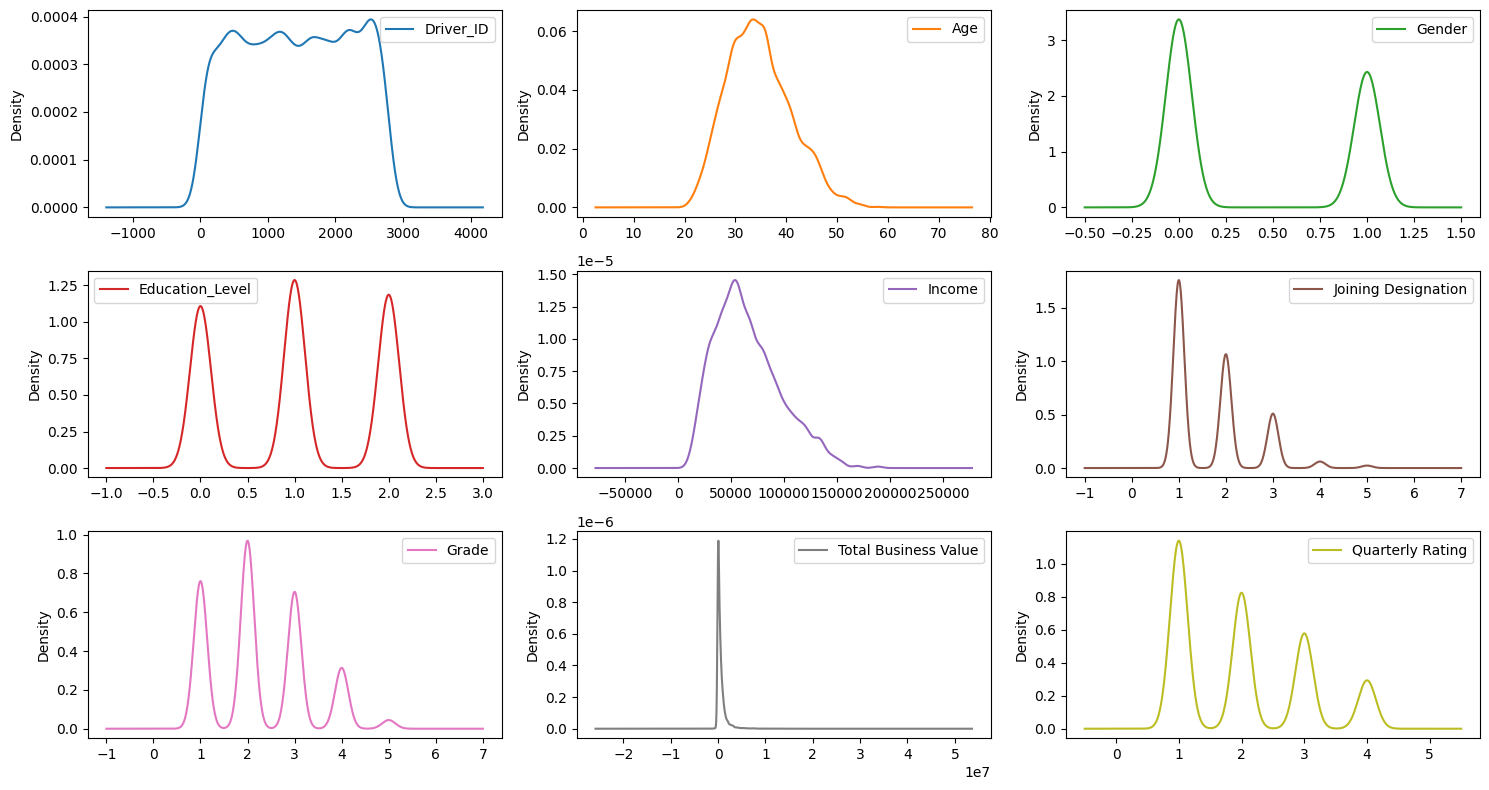

In [472]:
plt.rcParams['figure.figsize'] = (15, 8)
num_vars.plot(kind='kde', subplots=True, layout=(3,3),sharex=False)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

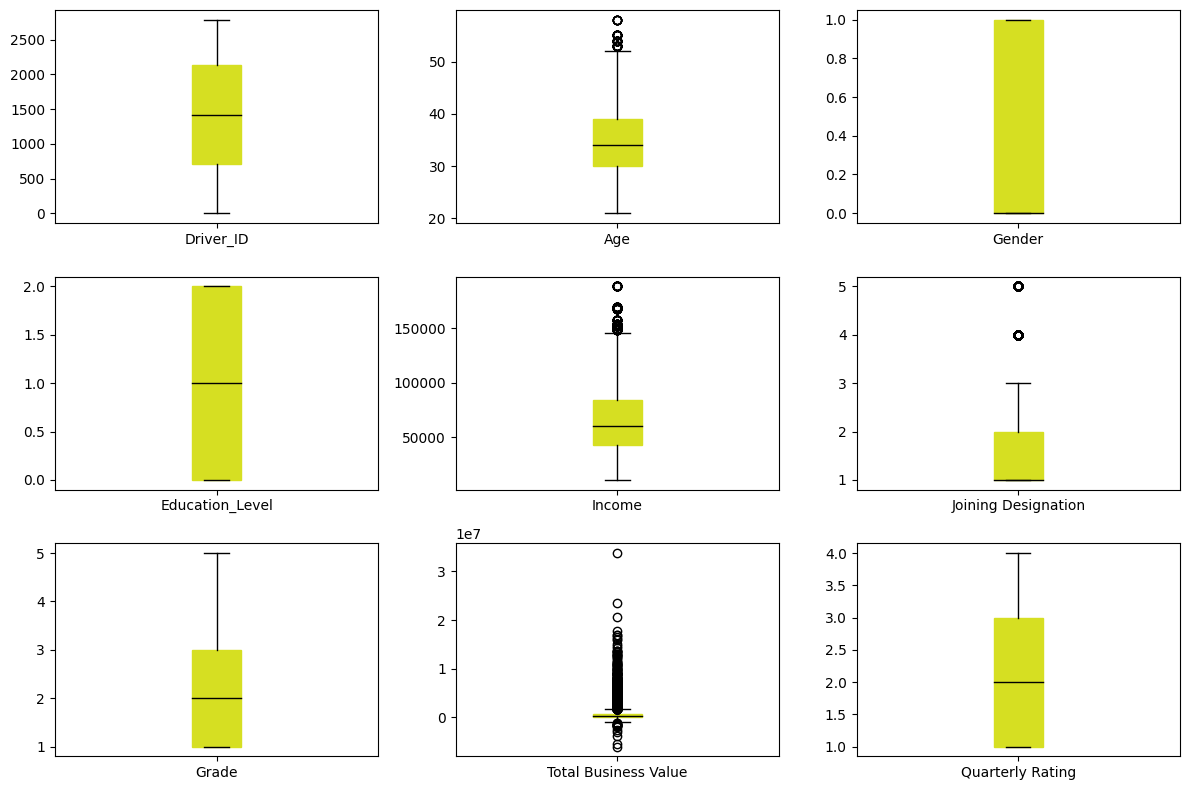

In [473]:
plt.rcParams['figure.figsize'] = (12, 8)
num_vars.plot(kind='box', subplots=True, layout=(3,3),sharex=False,color=dict(boxes='#D6DF22', whiskers='black', medians='black', caps='black'),
                     patch_artist=True)
plt.tight_layout()
plt.show()

# Feature Engineering

In [474]:
df['next_rating']=df.groupby('Driver_ID')['Quarterly Rating'].shift(-1)
# df['next_rating']=df['next_rating'].fillna(method='ffill')
# df['next_rating']=df['next_rating'].astype('int')

df['next_Income']=df.groupby('Driver_ID')['Income'].shift(-1)
# df['next_Income']=df.['next_Income']fillna(method='ffill')


In [475]:
conditions=[df['next_rating']-df['Quarterly Rating']>0,
            df['next_rating']-df['Quarterly Rating']==0,
            df['next_rating']-df['Quarterly Rating']<0]

choices=[1,0,-1]
df['Ratings_increased']=np.select(conditions,choices,default=0)

In [476]:
conditions=[df['next_Income']-df['Income']>0,
            df['next_Income']-df['Income']==0,
            df['next_Income']-df['Income']<0]
df['Income_increased']=np.select(conditions,choices,default=0)

In [477]:
df['Churn']=np.where(df['LastWorkingDate'].isna(),0,1)
# df.drop(columns=['next_rating','next_Income'],inplace=True)

In [478]:
df['Quarterly Rating']=pd.Categorical(df['Quarterly Rating'],
                               categories=[1,2,3,4,5],
                               ordered=True)

In [479]:
df[df['Driver_ID']==62]

,Reporting_month,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,next_rating,next_Income,Ratings_increased,Income_increased,Churn
385,2020-12-01,62,27.0,0,C9,2,62376,2020-11-28,NaT,1,1,0,1,NaN,NaN,0,0,0


In [480]:
# df[['Driver_ID','Quarterly Rating','Ratings_increased']].iloc[100:150]

In [481]:
# df.groupby('Driver_ID')['Ratings_increased'].sum().value_counts()

In [482]:
# Function to print basic useful details for categorial column
def get_column_details(df,column,tittle):
    print("Details of",column,"column")
    print('*'*50)

    #DataType of column
    print("\nDataType: ",df[column].dtype)
    print('*'*50)


    #Get Number of Unique Values
    print("\nNumber of Unique Values: ",df[column].nunique())
    print('*'*50)


    #Get Category counts of Column
    print(f"\nCount of Drivers {tittle} wise:\n")
    print(df[column].value_counts())
    print('*'*50)
    print(f"\nPercentage of Drivers {tittle} wise:\n")
    print(round(df[column].value_counts(normalize=True)*100,2))
    print('*'*50)

    # colors = plt.cm.viridis(np.linspace(0, 1, a))

    # # visualising plot
    # plt.figure(figsize=plot_size)
    # plt.title(f"\n\nNumber of {tittle} Drivers {column} wise\n")

    # df[column].value_counts()[:a].plot(kind=plt_req,color=colors)
    # # plt.gca().invert_yaxis()
    # plt.show()

In [483]:
get_column_details(df,column='Reporting_month',tittle='Reporting Month')

Details of Reporting_month column
**************************************************

DataType:  datetime64[ns]
**************************************************

Number of Unique Values:  24
**************************************************

Count of Drivers Reporting Month wise:

Reporting_month
2019-01-01    1022
2019-02-01     944
2019-03-01     870
2020-12-01     819
2020-10-01     818
2020-08-01     812
2020-09-01     809
2020-07-01     806
2020-11-01     805
2019-12-01     795
2019-04-01     794
2020-01-01     782
2019-11-01     781
2020-06-01     770
2020-05-01     766
2019-05-01     764
2019-09-01     762
2020-02-01     761
2019-07-01     757
2019-08-01     754
2019-10-01     739
2020-04-01     729
2019-06-01     726
2020-03-01     719
Name: count, dtype: int64
**************************************************

Percentage of Drivers Reporting Month wise:

Reporting_month
2019-01-01    5.35
2019-02-01    4.94
2019-03-01    4.55
2020-12-01    4.29
2020-10-01    4.28
2020-08-0

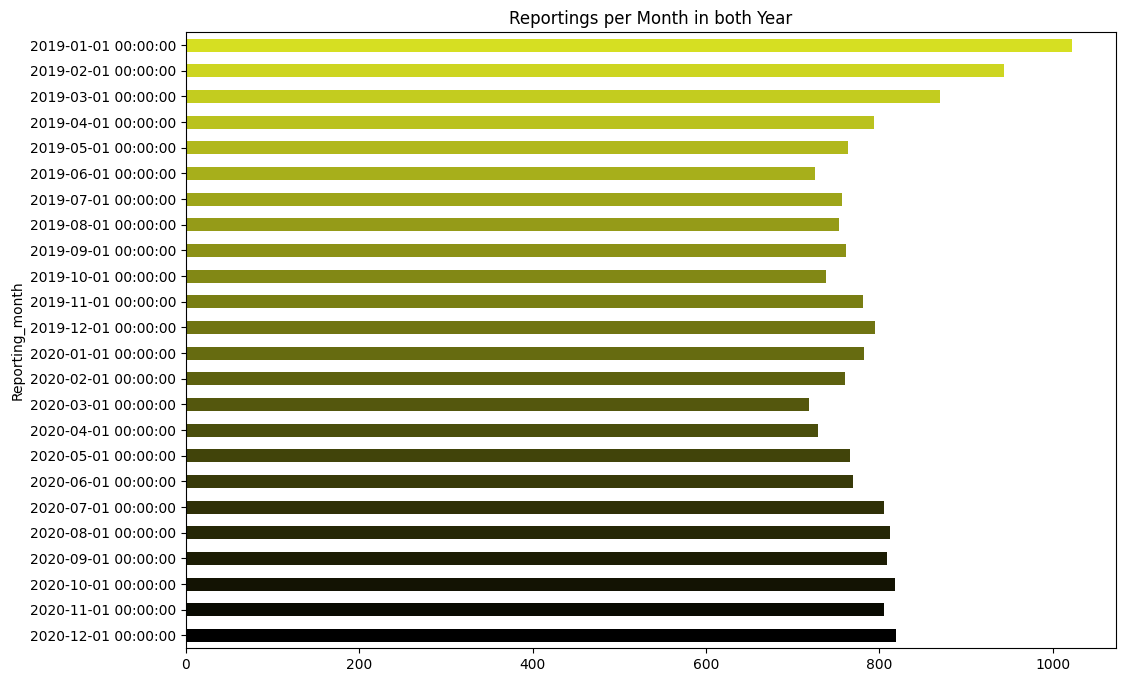

In [484]:
# Define custom colors
colors = ['#D6DF22', 'black']

# Create a gradient of 24 colors between the two
cmap_custom = LinearSegmentedColormap.from_list("custom_cmap", colors, N=24)

df['Reporting_month'].value_counts().sort_index().plot(kind='barh',color=[cmap_custom(i/24) for i in range(24)])#'#D6DF22')
plt.title('Reportings per Month in both Year')
plt.gca().invert_yaxis()
plt.show()


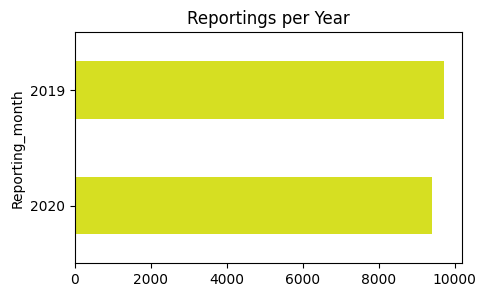

In [485]:
plt.figure(figsize=(5,3))
df['Reporting_month'].dt.year.value_counts().sort_index().plot(kind='barh',color='#D6DF22')
plt.title('Reportings per Year')
plt.gca().invert_yaxis()
plt.show()

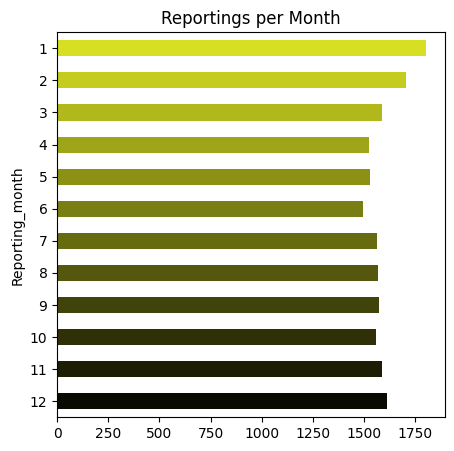

In [486]:
plt.figure(figsize=(5,5))
df['Reporting_month'].dt.month.value_counts().sort_index().plot(kind='barh',color=[cmap_custom(i/12) for i in range(12)])
plt.title('Reportings per Month')
plt.gca().invert_yaxis()
plt.show()

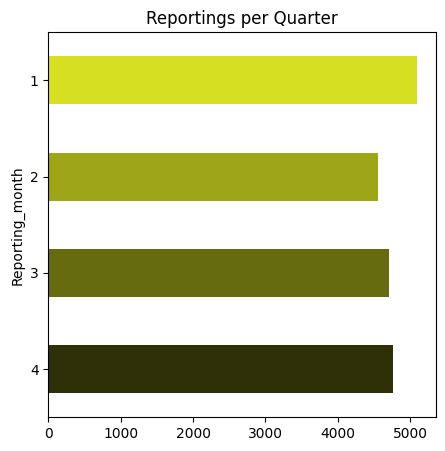

In [487]:
plt.figure(figsize=(5,5))
df['Reporting_month'].dt.quarter.value_counts().sort_index().plot(kind='barh',color=[cmap_custom(i/4) for i in range(4)])
plt.title('Reportings per Quarter')
plt.gca().invert_yaxis()
plt.show()

In [488]:
driver_total=df.Driver_ID.nunique()
driver_left=df.groupby('Driver_ID')['LastWorkingDate'].count().sum()

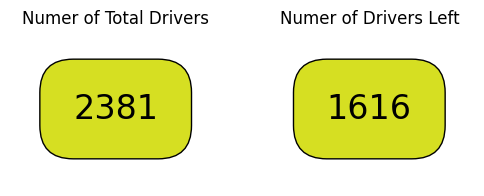

In [489]:
import matplotlib.pyplot as plt

# Create a figure
plt.figure(figsize=(6, 2))
plt.subplot(1,2,1)
# Display a number inside a bo
plt.title('Numer of Total Drivers')

plt.text(0.5, 0.5,driver_total , fontsize=24, bbox=dict(facecolor='#D6DF22', edgecolor='black', boxstyle='round,pad=1'), ha='center', va='center')
plt.axis('off')

plt.subplot(1,2,2)

plt.title('Numer of Drivers Left')
plt.text(0.5, 0.5,driver_left , fontsize=24, bbox=dict(facecolor='#D6DF22', edgecolor='black', boxstyle='round,pad=1'), ha='center', va='center')

# Remove axes
plt.axis('off')
# Show the plot
plt.show()


In [490]:
get_column_details(df,column='LastWorkingDate',tittle='Last days')

Details of LastWorkingDate column
**************************************************

DataType:  datetime64[ns]
**************************************************

Number of Unique Values:  493
**************************************************

Count of Drivers Last days wise:

LastWorkingDate
2020-07-29    70
2019-09-22    26
2019-03-17    14
2020-11-28    13
2020-02-17    13
              ..
2019-06-16     1
2020-11-17     1
2020-12-05     1
2019-09-02     1
2020-10-28     1
Name: count, Length: 493, dtype: int64
**************************************************

Percentage of Drivers Last days wise:

LastWorkingDate
2020-07-29    4.33
2019-09-22    1.61
2019-03-17    0.87
2020-11-28    0.80
2020-02-17    0.80
              ... 
2019-06-16    0.06
2020-11-17    0.06
2020-12-05    0.06
2019-09-02    0.06
2020-10-28    0.06
Name: proportion, Length: 493, dtype: float64
**************************************************


<Axes: xlabel='LastWorkingDate'>

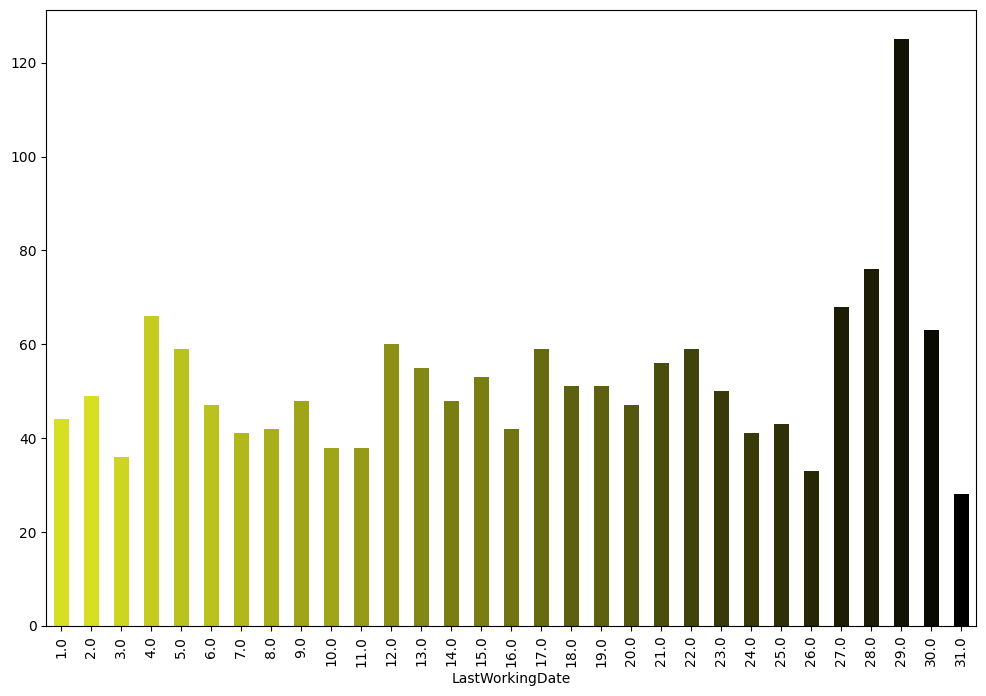

In [491]:
df['LastWorkingDate'].dt.day.value_counts().sort_index().plot(kind='bar',color=[cmap_custom(i/31) for i in range(31)])

<Axes: xlabel='LastWorkingDate'>

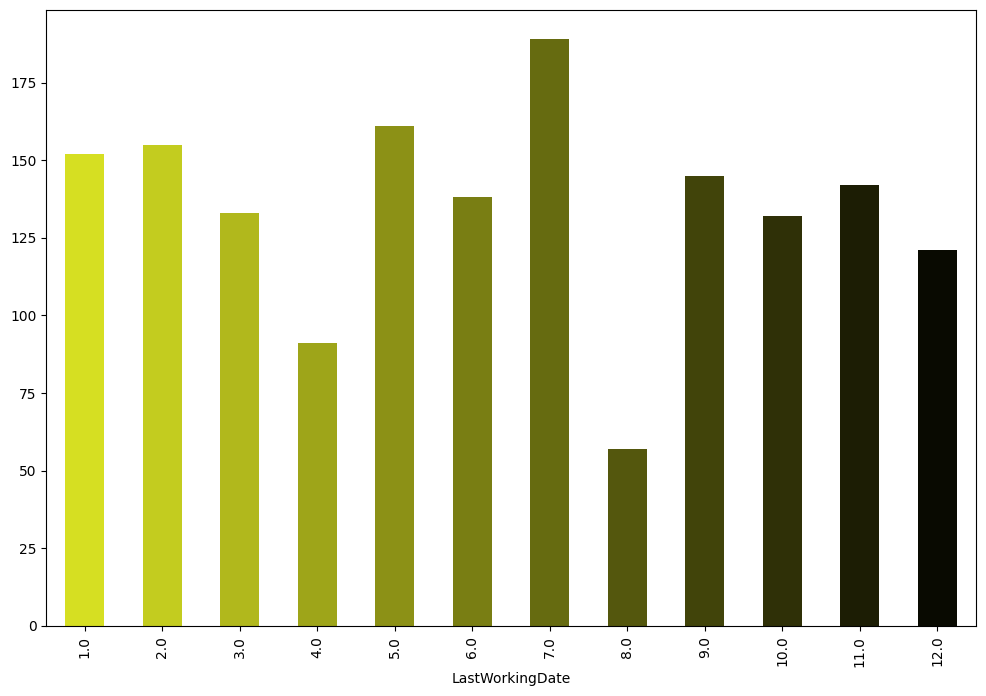

In [492]:
df['LastWorkingDate'].dt.month.value_counts().sort_index().plot(kind='bar',color=[cmap_custom(i/12) for i in range(12)])


<Axes: xlabel='LastWorkingDate'>

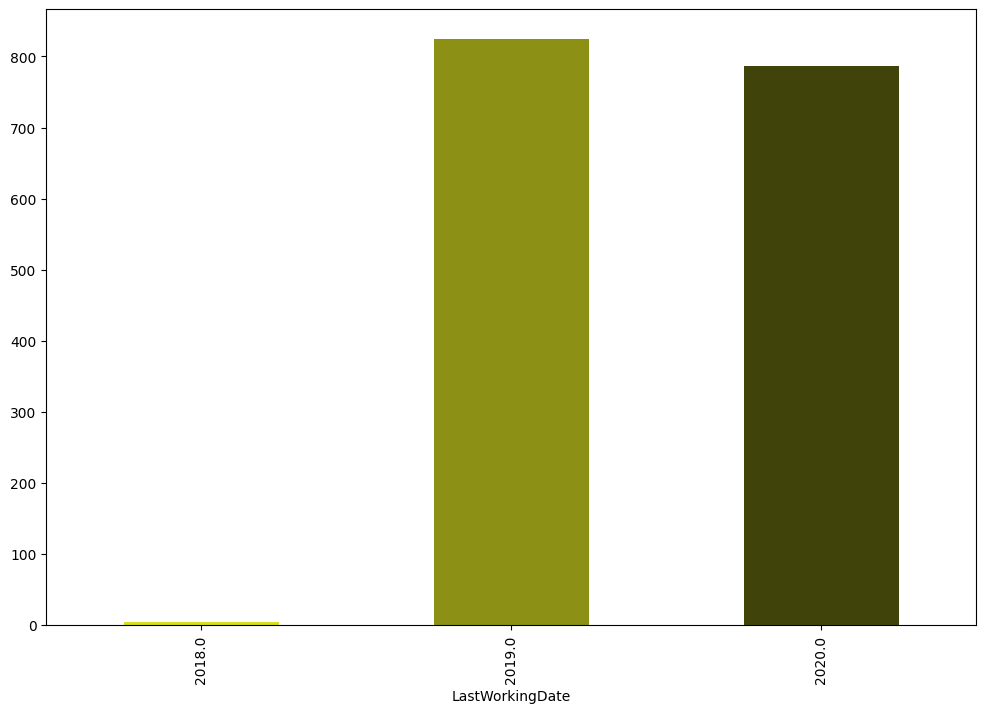

In [493]:
df['LastWorkingDate'].dt.year.value_counts().sort_index().plot(kind='bar',color=[cmap_custom(i/3) for i in range(3)])


<Axes: xlabel='LastWorkingDate'>

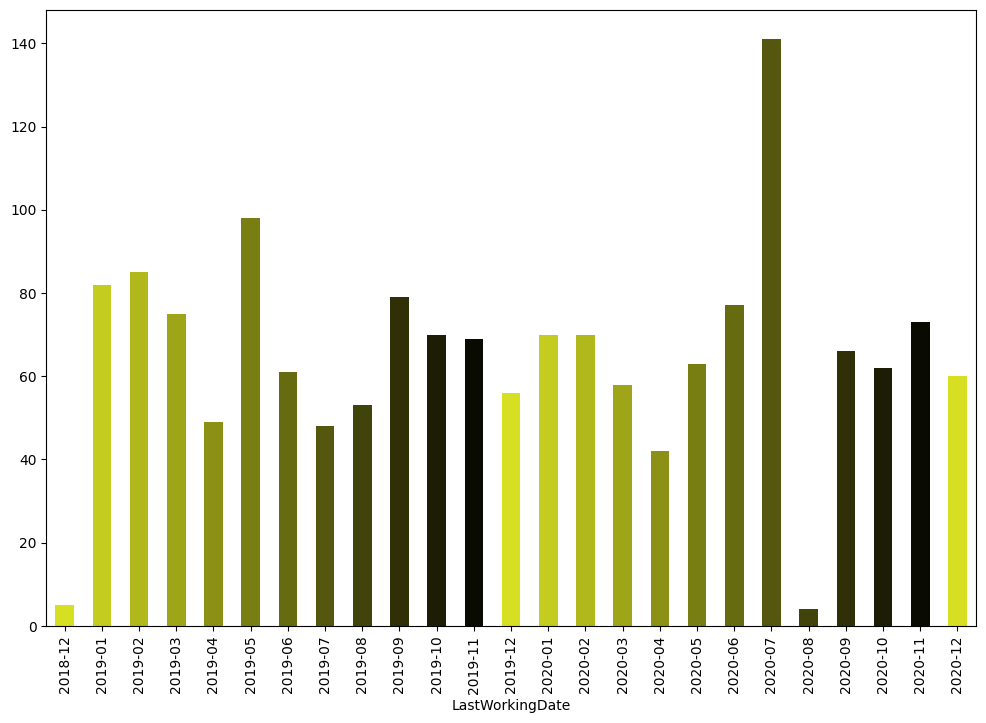

In [494]:
df['LastWorkingDate'].dt.strftime('%Y-%m').value_counts().sort_index().plot(kind='bar',color=[cmap_custom(i/12) for i in range(12)])

## Data Aggregation

In [495]:
aggfunction={'Reporting_month':'last',
             'Age':'max',
             'Gender':'last',
             'City':'last',
             'Education_Level':'max',
            'Income':'max',
            'Dateofjoining':'last',
            'LastWorkingDate':'last',
            'Joining Designation':'last',
             'Grade':'last',
             'Total Business Value':'sum',
              'Quarterly Rating':'last',
             'Ratings_increased':'sum',
             'Income_increased':'sum',
             'Churn':'last'}

In [496]:
df_agg=df.groupby('Driver_ID').agg(aggfunction).reset_index()
df_agg.head(20)

,Driver_ID,Reporting_month,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,Ratings_increased,Income_increased,Churn
0,1,2019-03-01,28.0,0,C23,2,57387,2018-12-24,2019-03-11,1,1,1715580,2,0,0,1
1,2,2020-12-01,31.0,0,C7,2,67016,2020-11-06,NaT,2,2,0,1,0,0,0
2,4,2020-04-01,43.0,0,C13,2,65603,2019-12-07,2020-04-27,2,2,350000,1,0,0,1
3,5,2019-03-01,29.0,0,C9,0,46368,2019-01-09,2019-03-07,1,1,120360,1,0,0,1
4,6,2020-12-01,31.0,1,C11,1,78728,2020-07-31,NaT,3,3,1265000,2,1,0,0
5,8,2020-11-01,34.0,0,C2,0,70656,2020-09-19,2020-11-15,3,3,0,1,0,0,1
6,11,2020-12-01,28.0,1,C19,2,42172,2020-12-07,NaT,1,1,0,1,0,0,0
7,12,2019-12-01,35.0,0,C23,2,28116,2019-06-29,2019-12-21,1,1,2607180,1,-1,0,1
8,13,2020-11-01,31.0,0,C19,2,119227,2015-05-28,2020-11-25,1,4,10213040,1,0,0,1
9,14,2020-12-01,39.0,1,C26,0,19734,2020-10-16,NaT,3,3,0,1,0,0,0


In [497]:
df_agg['Churn'].value_counts()

,count
Churn,
1,1616
0,765


In [498]:
driver_neg=df[df['Total Business Value']<0]['Driver_ID']
driver_neg.nunique()

136

In [499]:
df_agg[df_agg['Churn']==1]['Driver_ID'].isin(driver_neg).value_counts()
# who left has negative business

,count
Driver_ID,
False,1515
True,101


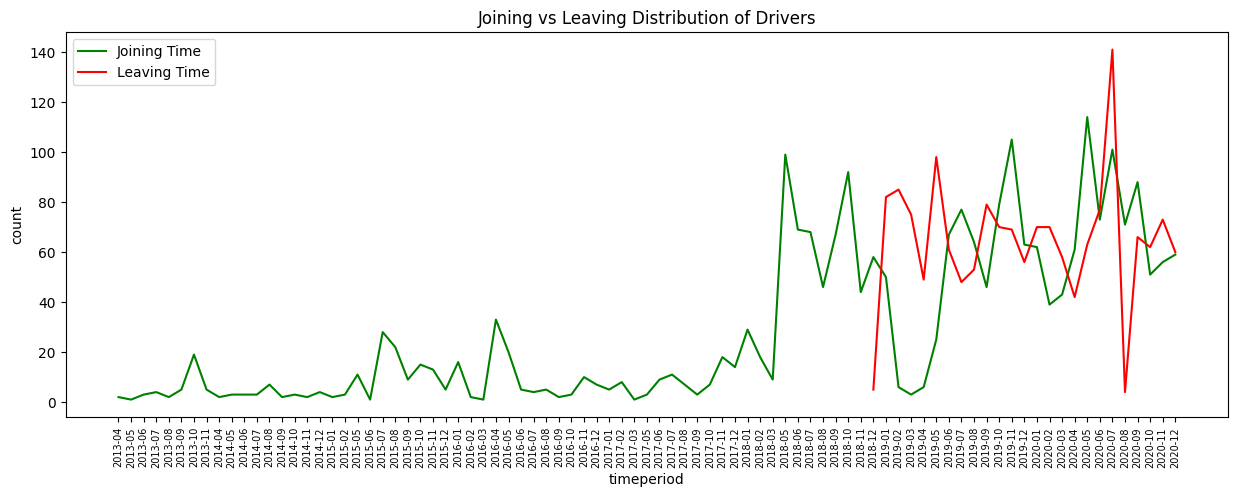

In [500]:
plt.figure(figsize=(15,5))
sns.lineplot(df_agg['Dateofjoining'].dt.strftime('%Y-%m').value_counts().sort_index(),color='green',label='Joining Time')
sns.lineplot(df_agg['LastWorkingDate'].dt.strftime('%Y-%m').value_counts().sort_index(),color='red',label='Leaving Time')
plt.title('Joining vs Leaving Distribution of Drivers')
plt.xticks(rotation=90,size=7)
plt.xlabel('timeperiod')
plt.legend()
plt.show()

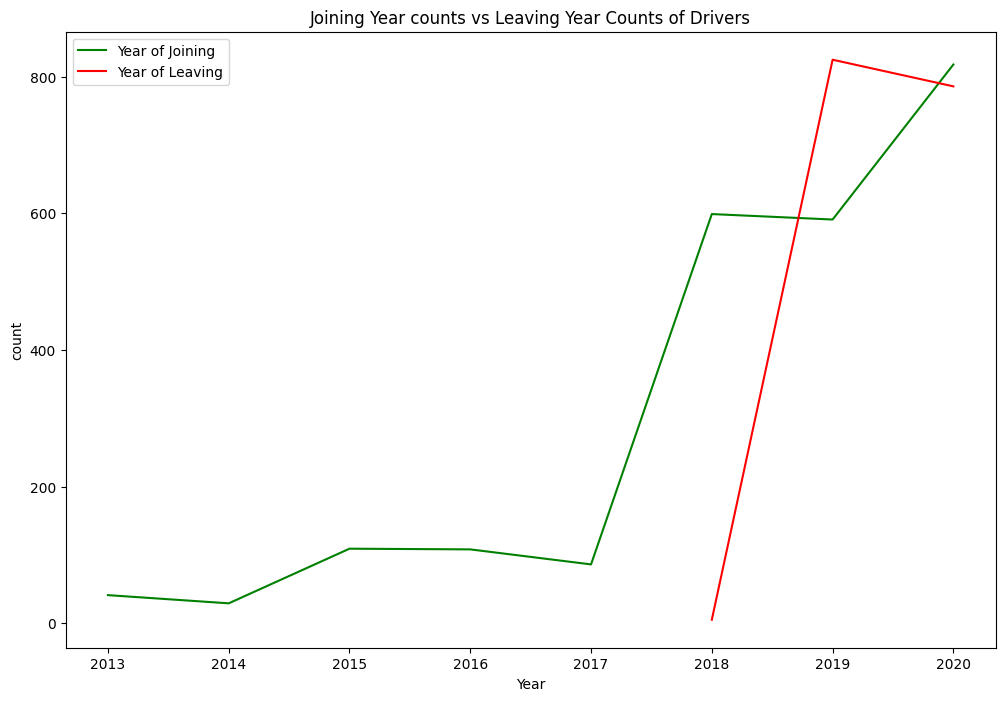

In [501]:
sns.lineplot(df_agg['Dateofjoining'].dt.year.value_counts(),color='green',label='Year of Joining')
sns.lineplot(df_agg['LastWorkingDate'].dt.year.value_counts(),color='red',label='Year of Leaving')
plt.title('Joining Year counts vs Leaving Year Counts of Drivers')
plt.xlabel('Year')
plt.legend()
plt.show()

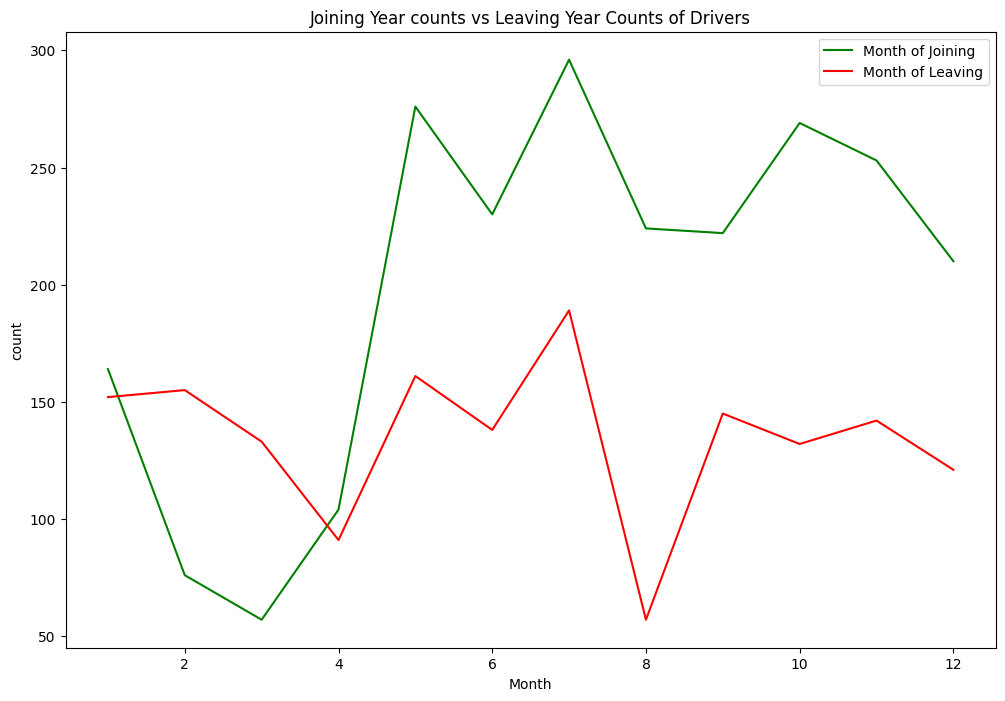

In [502]:
sns.lineplot(df_agg['Dateofjoining'].dt.month.value_counts(),color='green',label='Month of Joining')
sns.lineplot(df_agg['LastWorkingDate'].dt.month.value_counts(),color='red',label='Month of Leaving')
plt.title('Joining Year counts vs Leaving Year Counts of Drivers')
plt.xlabel('Month')
plt.legend()
plt.show()

In [503]:
sns.lineplot?

Text(0.5, 1.0, 'Distribution of Working Months')

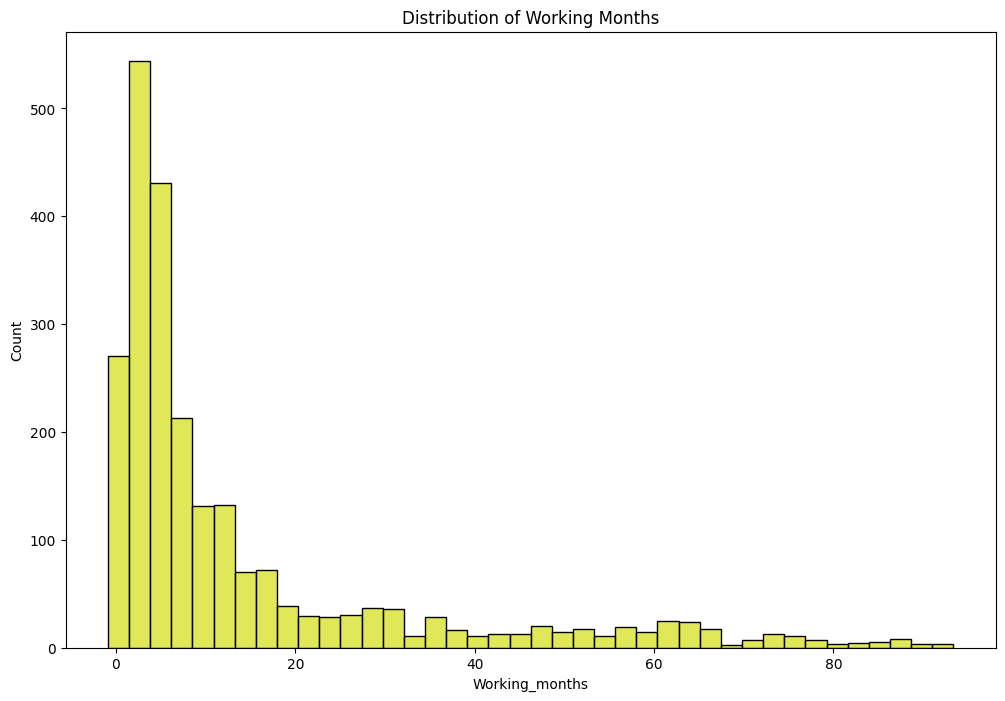

In [504]:
df_agg['Working_months']=df_agg['Reporting_month']-df_agg['Dateofjoining']
df_agg['Working_months']=(df_agg['Working_months'].dt.days/30).round(2)
sns.histplot(df_agg['Working_months'],bins=40,color='#D6DF22')
plt.title('Distribution of Working Months')

In [505]:
get_column_details(df_agg,'Gender',tittle='Gender')
# male drivers are more

Details of Gender column
**************************************************

DataType:  category
**************************************************

Number of Unique Values:  2
**************************************************

Count of Drivers Gender wise:

Gender
0    1404
1     977
Name: count, dtype: int64
**************************************************

Percentage of Drivers Gender wise:

Gender
0    58.97
1    41.03
Name: proportion, dtype: float64
**************************************************


In [506]:
data=df_agg['Gender'].value_counts()
# Create a pie chart
fig = go.Figure(data=[go.Pie(
    labels=['Male  ','Female  '],
    values=data.values,
    hole=0.4,  # Optional: create a donut chart
    hoverinfo='label+value',  # Show label, value, and percentage on hover
    textinfo='percent',  # Don't show text inside slices
    textfont=dict(size=12,weight='bold'),  # Font size for the percentage text on the chart
    hoverlabel=dict(
        font=dict(size=16)  # Set font size for the hover text
    ),
    marker=dict(colors=['#D6DF22', 'black'],line=dict(width=2, color='darkgrey')),  # Slice colors and shadow effect
    pull=[0, 0.1],  # Explode the second slice (female)
    rotation=180
)])
fig.update_traces(marker=dict(line=dict(width=2, color='darkgrey')))

# Update layout
fig.update_layout(title=dict(
        text='Gender Distribution of Drivers',
        font=dict(size=24, color='black', family='Arial', weight='bold'),  # Bold title
        x=0.5,  # Center the title
        xanchor='center'  # Anchor the title to the center
    ),showlegend=True,width=500, height=500)

# Show the plot
fig.show()


In [507]:
get_column_details(df_agg,'City',tittle='City')

Details of City column
**************************************************

DataType:  object
**************************************************

Number of Unique Values:  29
**************************************************

Count of Drivers City wise:

City
C20    152
C15    101
C29     96
C26     93
C8      89
C27     89
C10     86
C16     84
C22     82
C3      82
C28     82
C12     81
C5      80
C1      80
C21     79
C14     79
C6      78
C4      77
C7      76
C9      75
C25     74
C23     74
C24     73
C19     72
C2      72
C17     71
C13     71
C18     69
C11     64
Name: count, dtype: int64
**************************************************

Percentage of Drivers City wise:

City
C20    6.38
C15    4.24
C29    4.03
C26    3.91
C8     3.74
C27    3.74
C10    3.61
C16    3.53
C22    3.44
C3     3.44
C28    3.44
C12    3.40
C5     3.36
C1     3.36
C21    3.32
C14    3.32
C6     3.28
C4     3.23
C7     3.19
C9     3.15
C25    3.11
C23    3.11
C24    3.07
C19    3.02
C2     3.02
C17 

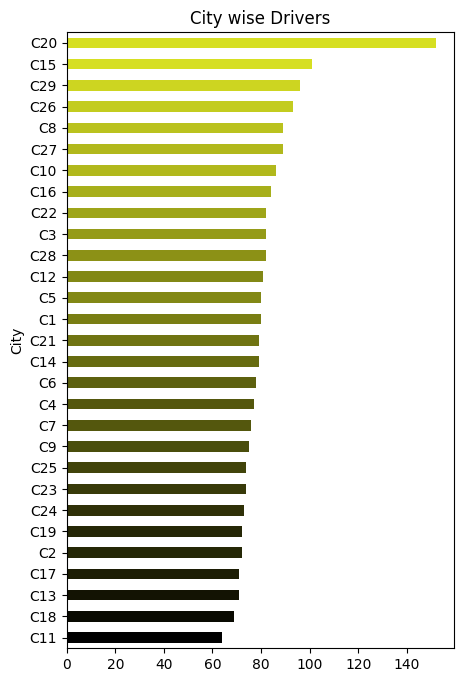

In [508]:
plt.figure(figsize=(5,8))
df_agg['City'].value_counts().plot(kind='barh',color=[cmap_custom(i/29) for i in range(29)])
plt.title('City wise Drivers')
plt.gca().invert_yaxis()
plt.show()

In [509]:
get_column_details(df_agg,'Education_Level',tittle='Education Level')

Details of Education_Level column
**************************************************

DataType:  category
**************************************************

Number of Unique Values:  3
**************************************************

Count of Drivers Education Level wise:

Education_Level
2    802
1    795
0    784
Name: count, dtype: int64
**************************************************

Percentage of Drivers Education Level wise:

Education_Level
2    33.68
1    33.39
0    32.93
Name: proportion, dtype: float64
**************************************************


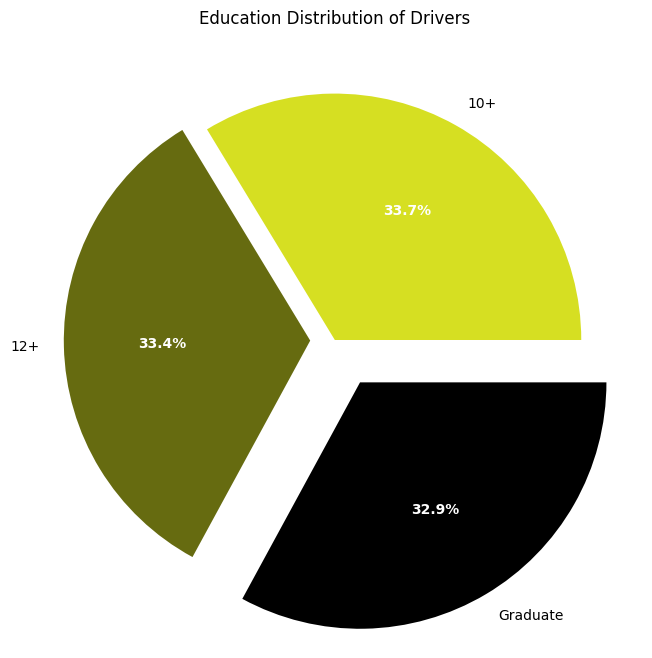

In [510]:
data=df_agg['Education_Level'].value_counts()

# Create pie chart
wedges, texts, autotexts = plt.pie(data, autopct='%1.1f%%', explode=[0, 0.1,0.2], colors=cmap_custom(np.linspace(0, 1, 3)),labels=['10+','12+','Graduate'],
                                    textprops={'color': 'black'}, labeldistance=1.1)

# Customize percentage labels
for autotext in autotexts:
    autotext.set_color('white')  # Set the color of percentage text to white
    autotext.set_fontweight('bold')  # Set the font weight of percentage text to bold

# Set the title
plt.title('Education Distribution of Drivers')
plt.show()

In [511]:
get_column_details(df_agg,'Joining Designation',tittle='Joining Designation')

Details of Joining Designation column
**************************************************

DataType:  category
**************************************************

Number of Unique Values:  5
**************************************************

Count of Drivers Joining Designation wise:

Joining Designation
1    1026
2     815
3     493
4      36
5      11
Name: count, dtype: int64
**************************************************

Percentage of Drivers Joining Designation wise:

Joining Designation
1    43.09
2    34.23
3    20.71
4     1.51
5     0.46
Name: proportion, dtype: float64
**************************************************


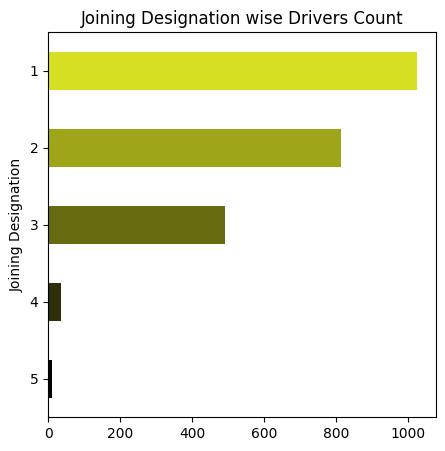

In [512]:
plt.figure(figsize=(5,5))
df_agg['Joining Designation'].value_counts().plot(kind='barh',color=cmap_custom(np.linspace(0,1,5)))
plt.title('Joining Designation wise Drivers Count')
plt.gca().invert_yaxis()
plt.show()

In [513]:
get_column_details(df_agg,'Grade',tittle='Grade')

Details of Grade column
**************************************************

DataType:  category
**************************************************

Number of Unique Values:  5
**************************************************

Count of Drivers Grade wise:

Grade
2    855
1    741
3    623
4    138
5     24
Name: count, dtype: int64
**************************************************

Percentage of Drivers Grade wise:

Grade
2    35.91
1    31.12
3    26.17
4     5.80
5     1.01
Name: proportion, dtype: float64
**************************************************


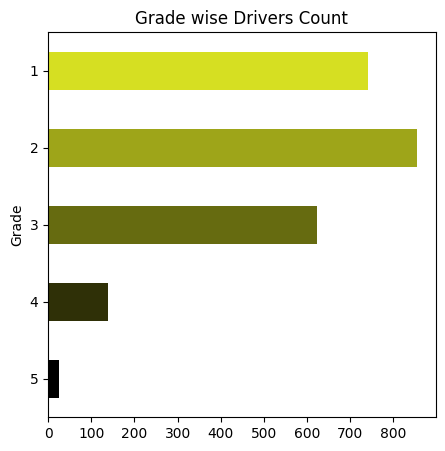

In [514]:
plt.figure(figsize=(5,5))
df_agg['Grade'].value_counts().sort_index().plot(kind='barh',color=cmap_custom(np.linspace(0,1,5)))
plt.title('Grade wise Drivers Count')
plt.gca().invert_yaxis()
plt.show()

In [515]:
get_column_details(df_agg,'Quarterly Rating',tittle='Quarterly Ratings')

Details of Quarterly Rating column
**************************************************

DataType:  category
**************************************************

Number of Unique Values:  4
**************************************************

Count of Drivers Quarterly Ratings wise:

Quarterly Rating
1    1744
2     362
3     168
4     107
5       0
Name: count, dtype: int64
**************************************************

Percentage of Drivers Quarterly Ratings wise:

Quarterly Rating
1    73.25
2    15.20
3     7.06
4     4.49
5     0.00
Name: proportion, dtype: float64
**************************************************


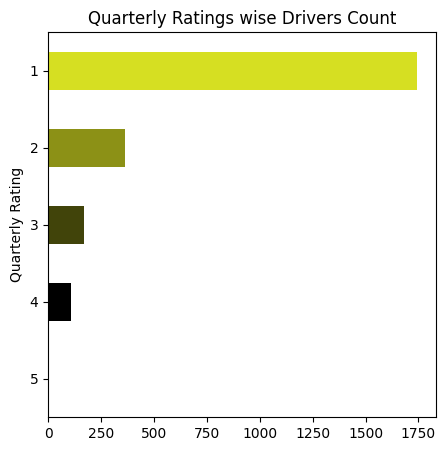

In [516]:
plt.figure(figsize=(5,5))
df_agg['Quarterly Rating'].value_counts().sort_index().plot(kind='barh',color=cmap_custom(np.linspace(0,1,4)))
plt.title('Quarterly Ratings wise Drivers Count')
plt.gca().invert_yaxis()
plt.show()

In [517]:
get_column_details(df_agg,'Ratings_increased',tittle='Ratings increased')

Details of Ratings_increased column
**************************************************

DataType:  int64
**************************************************

Number of Unique Values:  7
**************************************************

Count of Drivers Ratings increased wise:

Ratings_increased
 0    1614
-1     361
 1     274
 2      60
-2      58
-3      10
 3       4
Name: count, dtype: int64
**************************************************

Percentage of Drivers Ratings increased wise:

Ratings_increased
 0    67.79
-1    15.16
 1    11.51
 2     2.52
-2     2.44
-3     0.42
 3     0.17
Name: proportion, dtype: float64
**************************************************


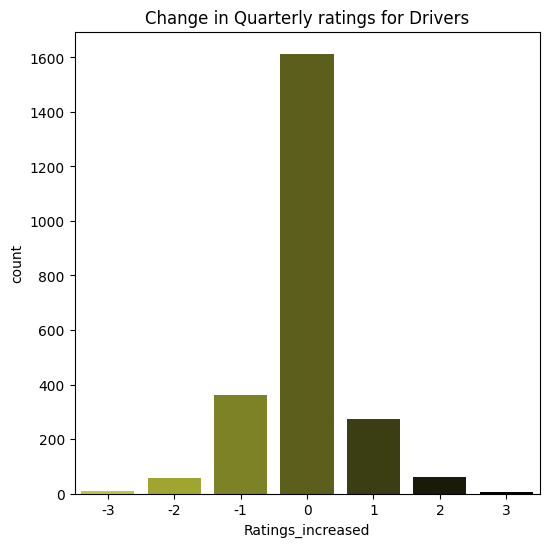

In [518]:
plt.figure(figsize=(6,6))
plt.title('Change in Quarterly ratings for Drivers')
sns.countplot(x='Ratings_increased',data=df_agg,palette=cmap_custom(np.linspace(0,1,7)))
plt.show()

In [519]:
get_column_details(df_agg,'Income_increased',tittle='Income increased')

Details of Income_increased column
**************************************************

DataType:  int64
**************************************************

Number of Unique Values:  2
**************************************************

Count of Drivers Income increased wise:

Income_increased
0    2338
1      43
Name: count, dtype: int64
**************************************************

Percentage of Drivers Income increased wise:

Income_increased
0    98.19
1     1.81
Name: proportion, dtype: float64
**************************************************


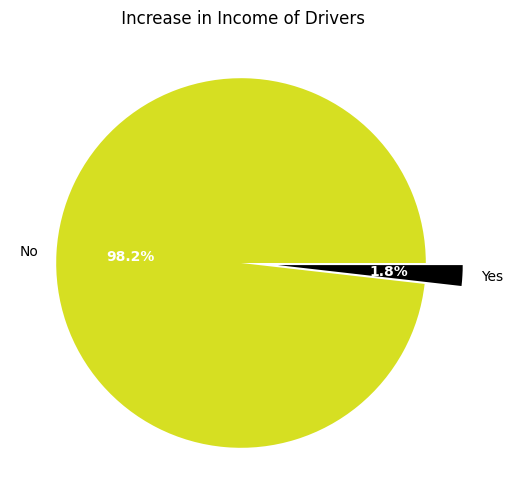

In [520]:
plt.figure(figsize=(6,6))
plt.title(' Increase in Income of Drivers')
wedges, axis, autotexts=plt.pie(df_agg['Income_increased'].value_counts(),autopct='%1.1f%%',explode=[0,0.2],colors=cmap_custom(np.linspace(0,1,2)),\
        labels=['No','Yes'],textprops={'color': 'black'}, labeldistance=1.1)

for autotext in autotexts:
    autotext.set_color('white')  # Set the color of percentage text to white
    autotext.set_fontweight('bold')  # Set the font weight of percentage text to bold

plt.show()

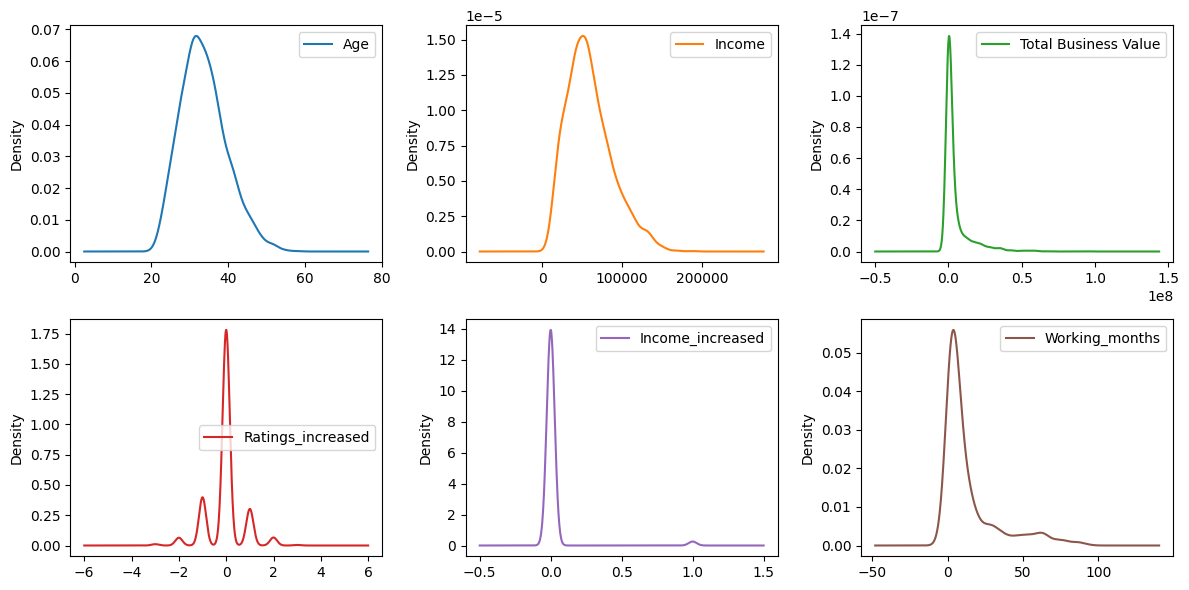

In [521]:
num_col=df_agg.select_dtypes(np.number).columns
num_col=num_col.drop(['Driver_ID','Churn'])
plt.rcParams['figure.figsize'] = (12, 6)
df_agg[num_col].plot(kind='kde',subplots=True,layout=(2,3),sharex=False)
plt.tight_layout()
plt.show()

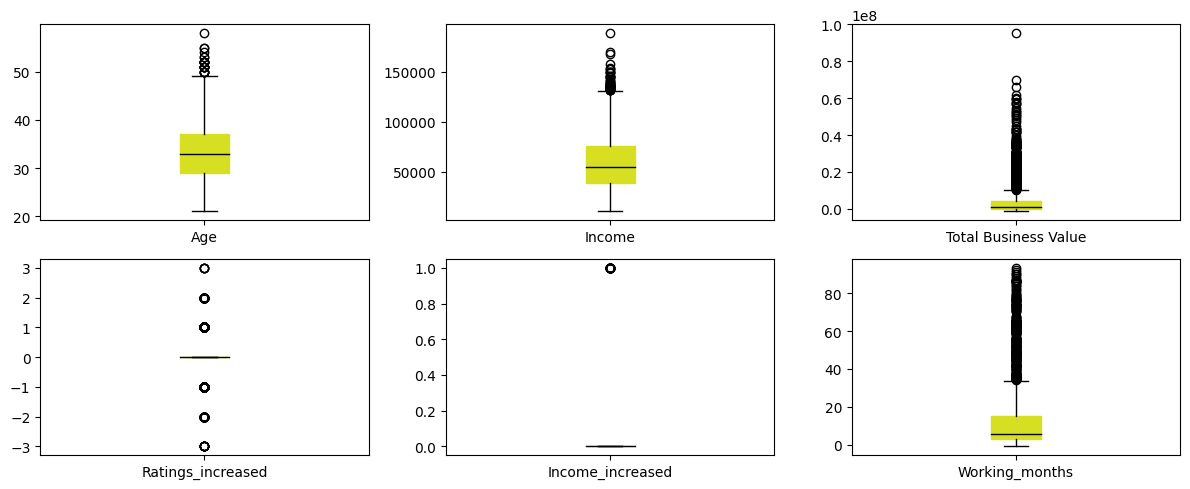

In [522]:
plt.rcParams['figure.figsize'] = (12, 5)
# Plotting the boxplot with filled boxes
df_agg[num_col].plot(kind='box', subplots=True, layout=(2, 3), sharex=False, \
                     color=dict(boxes='#D6DF22', whiskers='black', medians='black', caps='black'), patch_artist=True)

plt.tight_layout()
plt.show()

In [523]:
df_agg['Age']=np.clip(df_agg['Age'],20,np.percentile(df_agg['Age'],95))
df_agg['Income']=np.clip(df_agg['Income'],0,np.percentile(df_agg['Income'],95))
df_agg['Total Business Value']=np.clip(df_agg['Total Business Value'],df_agg['Total Business Value'].min(),np.percentile(df_agg['Total Business Value'],95))
df_agg['Working_months']=np.clip(df_agg['Working_months'],0,np.percentile(df_agg['Working_months'],95))

In [524]:
df_agg.describe().T

,count,mean,min,25%,50%,75%,max,std
Driver_ID,2381.0,1397.559009,1.0,695.0,1400.0,2100.0,2788.0,806.161628
Reporting_month,2381,2020-03-31 15:04:09.475010560,2019-01-01 00:00:00,2019-09-01 00:00:00,2020-06-01 00:00:00,2020-12-01 00:00:00,2020-12-01 00:00:00,NaN
Age,2381.0,33.527089,21.0,29.0,33.0,37.0,45.0,5.654904
Income,2381.0,58539.032759,10747.0,39104.0,55315.0,75986.0,113807.0,26404.699529
Dateofjoining,2381,2019-02-08 07:14:50.550189056,2013-04-01 00:00:00,2018-06-29 00:00:00,2019-07-21 00:00:00,2020-05-02 00:00:00,2020-12-28 00:00:00,NaN
LastWorkingDate,1616,2019-12-21 20:59:06.534653440,2018-12-31 00:00:00,2019-06-06 00:00:00,2019-12-20 12:00:00,2020-07-03 00:00:00,2020-12-28 00:00:00,NaN
Total Business Value,2381.0,3948889.895002,-1385530.0,0.0,817680.0,4173650.0,23471030.0,6599779.33701
Ratings_increased,2381.0,-0.042419,-3.0,0.0,0.0,0.0,3.0,0.718517
Income_increased,2381.0,0.01806,0.0,0.0,0.0,0.0,1.0,0.133195
Churn,2381.0,0.678706,0.0,0.0,1.0,1.0,1.0,0.467071


In [525]:
df_agg.describe(include=['object','category']).T

,count,unique,top,freq
Gender,2381,2,0,1404
City,2381,29,C20,152
Education_Level,2381,3,2,802
Joining Designation,2381,5,1,1026
Grade,2381,5,2,855
Quarterly Rating,2381,4,1,1744


# Bivariate

In [526]:
df_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Driver_ID             2381 non-null   int64         
 1   Reporting_month       2381 non-null   datetime64[ns]
 2   Age                   2381 non-null   float64       
 3   Gender                2381 non-null   category      
 4   City                  2381 non-null   object        
 5   Education_Level       2381 non-null   category      
 6   Income                2381 non-null   int64         
 7   Dateofjoining         2381 non-null   datetime64[ns]
 8   LastWorkingDate       1616 non-null   datetime64[ns]
 9   Joining Designation   2381 non-null   category      
 10  Grade                 2381 non-null   category      
 11  Total Business Value  2381 non-null   int64         
 12  Quarterly Rating      2381 non-null   category      
 13  Ratings_increased 

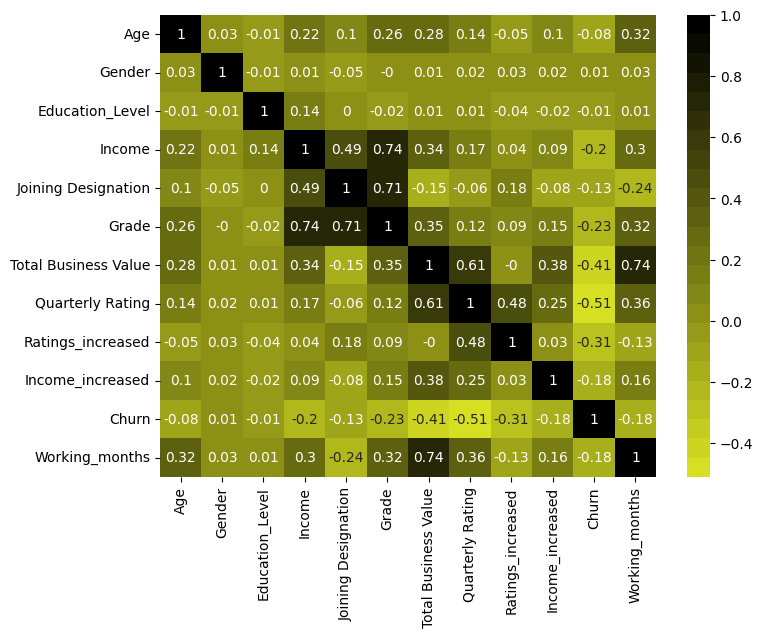

In [527]:
plt.figure(figsize=(8,6))
num_col=df_agg.select_dtypes(['int64','float64','category']).columns
num_col=num_col.drop(['Driver_ID'])
sns.heatmap(df_agg[num_col].corr().round(2),annot=True,cmap=cmap_custom)
plt.show()

In [528]:
# df_agg['Churn']=df_agg['Churn'].astype('category')

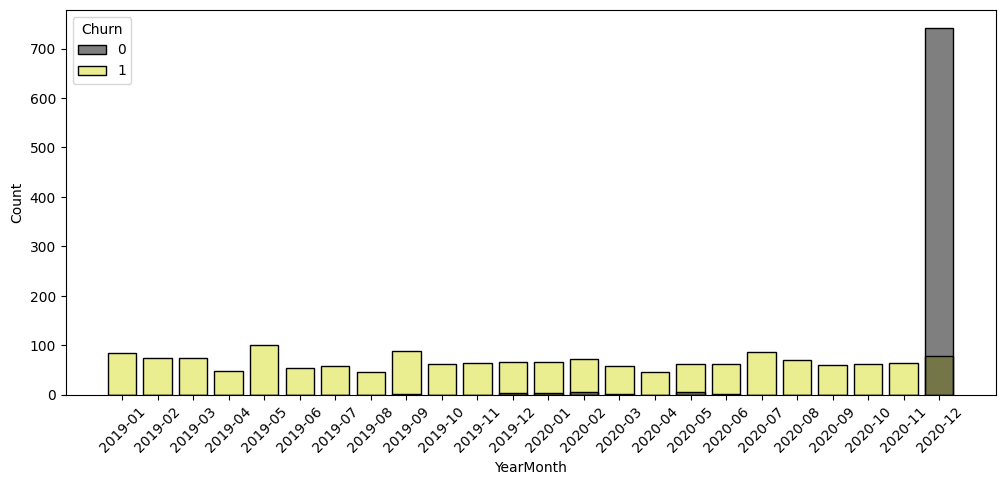

In [378]:
# Prepare the DataFrame with the necessary columns
# df_agg['YearMonth'] = df_agg['Reporting_month'].dt.strftime('%Y-%m')
# df_agg = df_agg.sort_values(by='YearMonth')

# sns.histplot( x=df_agg['YearMonth'], palette=cmap_custom(np.linspace(1,0,2)), hue=df_agg['Churn'], shrink=.8)

# plt.xticks(rotation=45)
# plt.show()


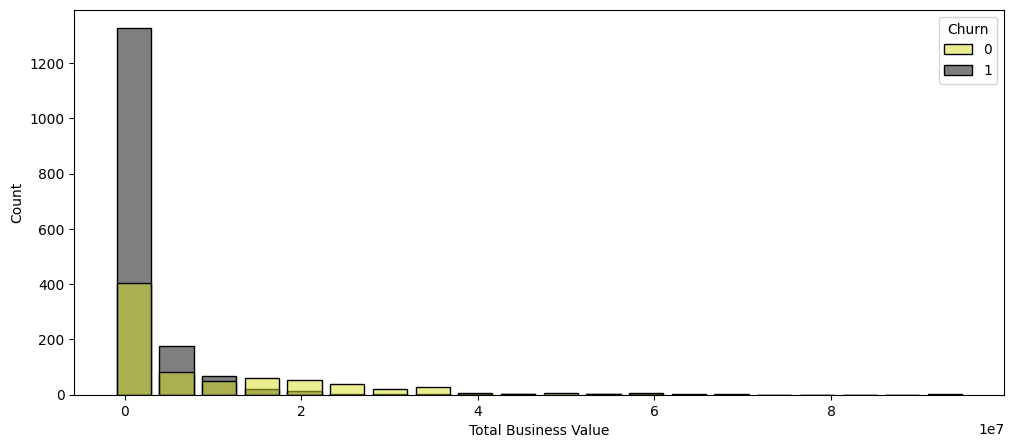

In [416]:
sns.histplot( x=df_agg['Total Business Value'], palette=['#D6DF22','black'], hue=df_agg['Churn'],bins=20, shrink=.8)
plt.show()

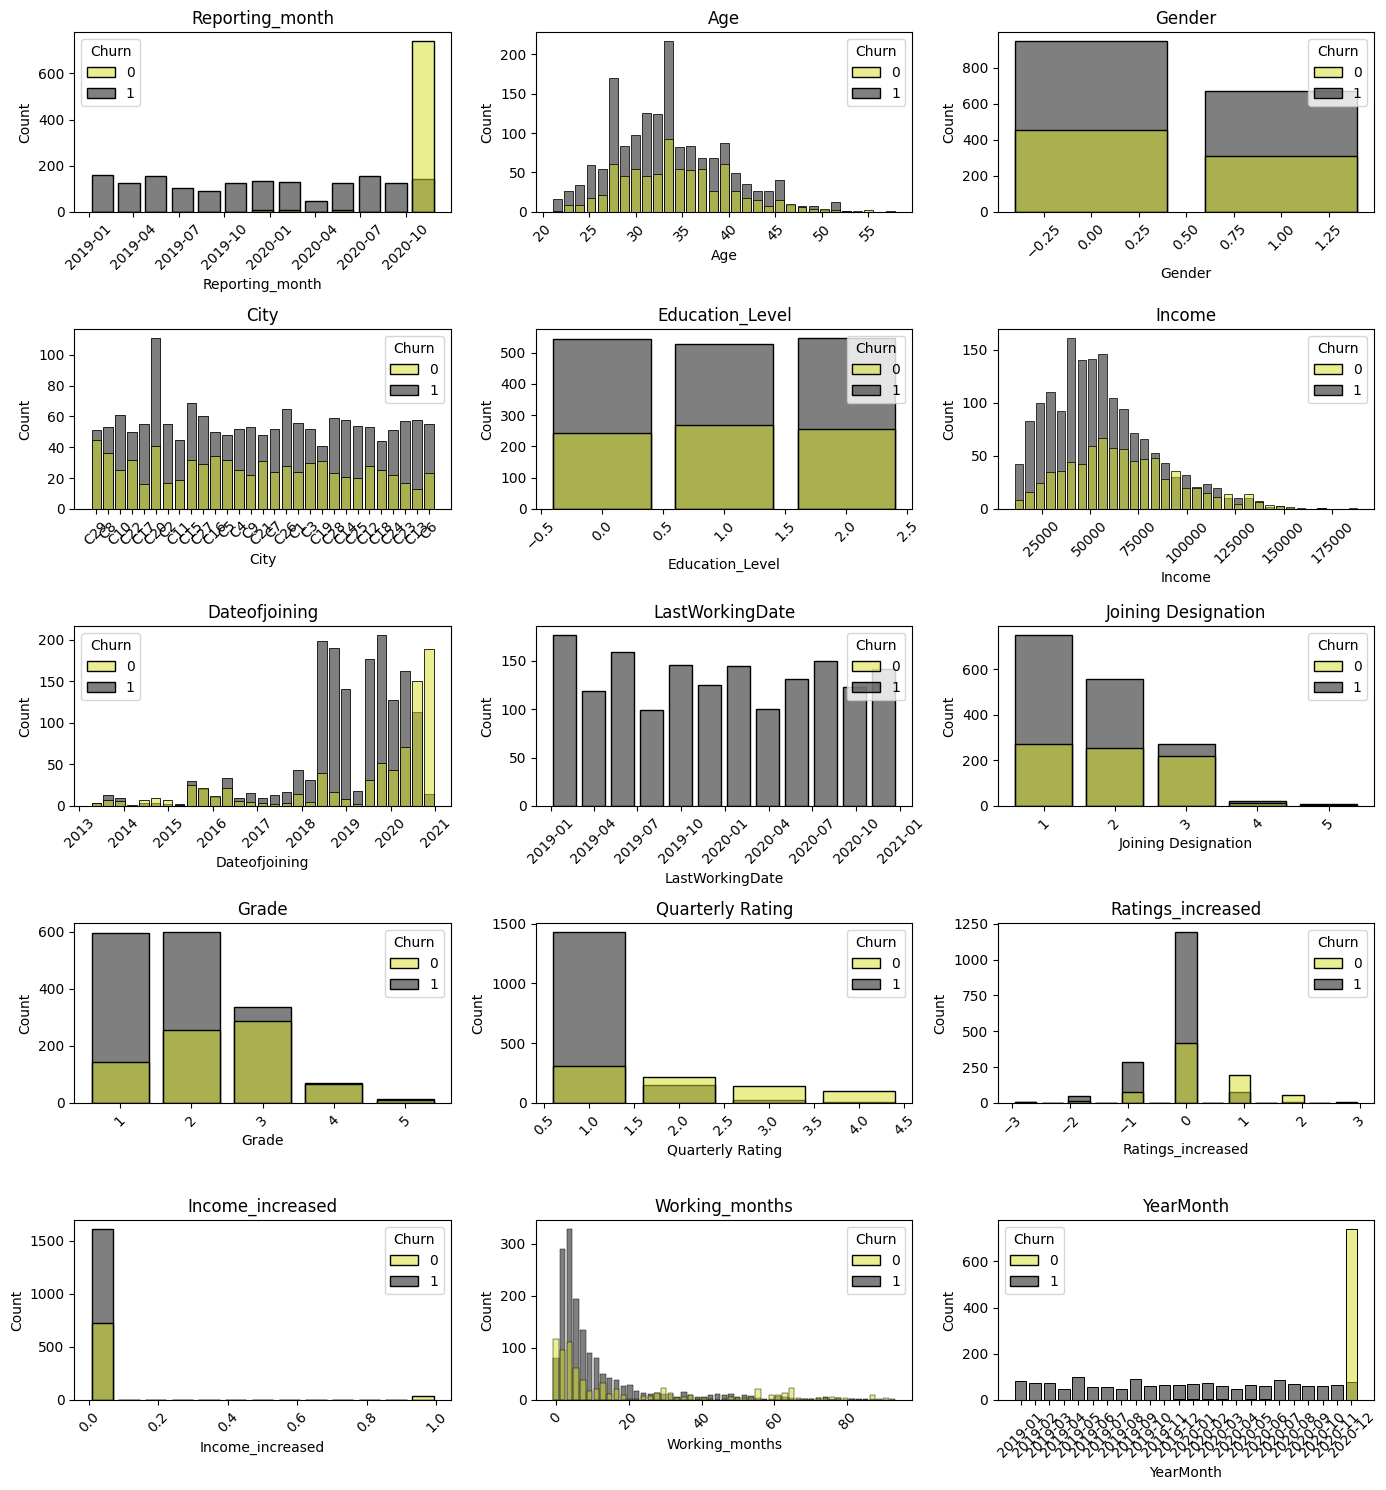

In [418]:
columns=df_agg.columns.drop(['Churn','Driver_ID','Total Business Value'])
plt.figure(figsize=(14,15))
for i,col in enumerate(columns):
  plt.subplot(5,3,i+1)
  sns.histplot(x=df_agg[col],hue=df_agg['Churn'],palette=['#D6DF22','black'],shrink=.8)
  plt.title(col)
  plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# multivariate

<Figure size 1400x1500 with 0 Axes>

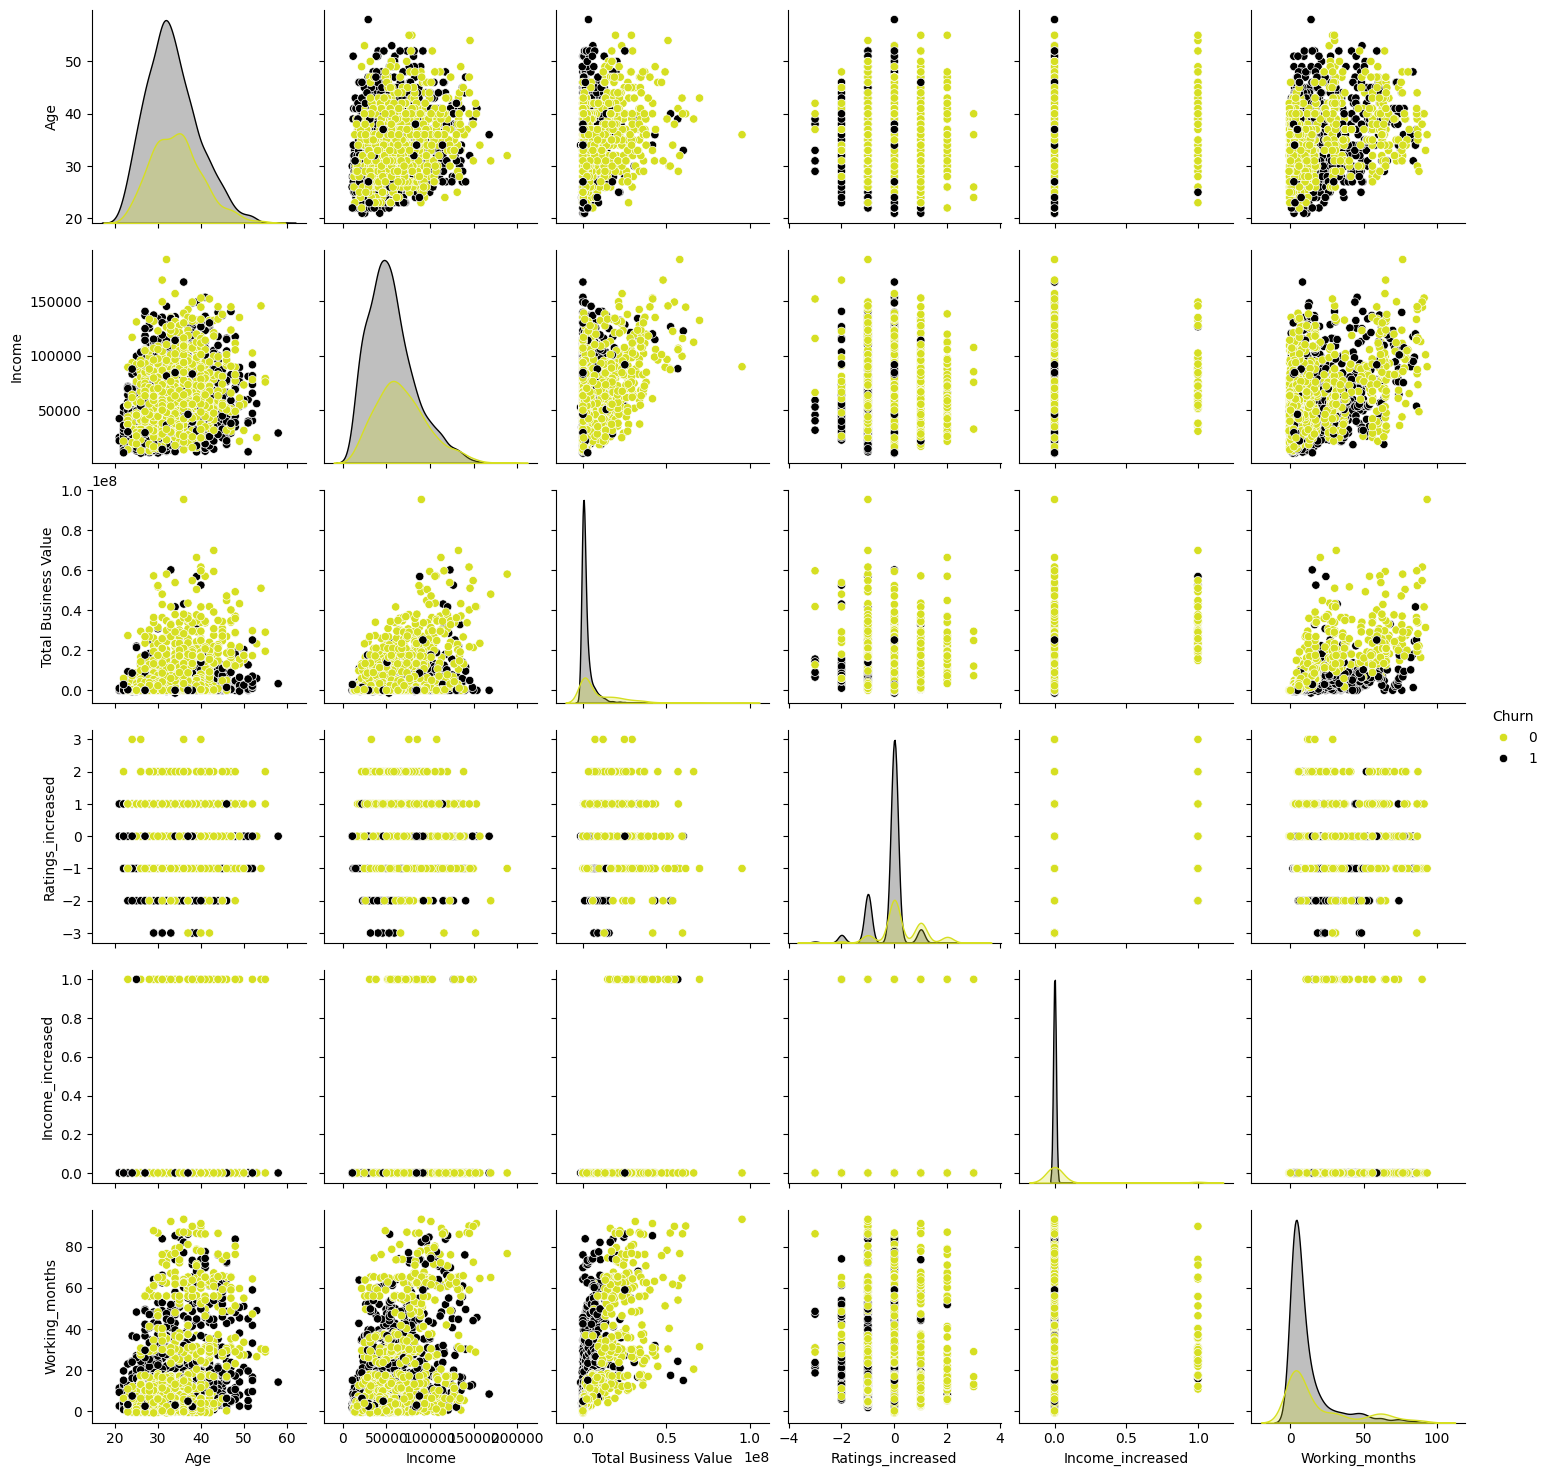

In [433]:
columns=df_agg.columns.drop(['Driver_ID','LastWorkingDate'])
plt.figure(figsize=(14,15))
sns.pairplot(df_agg[columns],hue='Churn',palette=cmap_custom(np.linspace(0,1,2)))
plt.show()

In [537]:
df_agg.drop(columns=['Dateofjoining','LastWorkingDate','Driver_ID','Reporting_month'],inplace=True)

In [538]:
df_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Age                   2381 non-null   float64 
 1   Gender                2381 non-null   category
 2   City                  2381 non-null   object  
 3   Education_Level       2381 non-null   category
 4   Income                2381 non-null   int64   
 5   Joining Designation   2381 non-null   category
 6   Grade                 2381 non-null   category
 7   Total Business Value  2381 non-null   int64   
 8   Quarterly Rating      2381 non-null   category
 9   Ratings_increased     2381 non-null   int64   
 10  Income_increased      2381 non-null   int64   
 11  Churn                 2381 non-null   int64   
 12  Working_months        2381 non-null   float64 
dtypes: category(5), float64(2), int64(5), object(1)
memory usage: 161.4+ KB


tasked to predict whether a driver will be leaving the company or not based on their attributes like

Demographics (city, age, gender etc.)
Tenure information (joining date, Last Date)
Historical data regarding the performance of the driver (Quarterly rating, Monthly business acquired, grade, Income)

**Concepts Tested:**

Ensemble Learning- Bagging<br>
Ensemble Learning- Boosting<br>
Working with an imbalanced dataset<br>

**What "good" looks like:**


Statistical summary of the derived dataset

Check correlation among independent variables and how they interact with each other

One hot encoding of the categorical variable

Class Imbalance Treatment

Standardization of training data

Using Ensemble learning - Bagging, Boosting methods with some hyper-parameter tuning

Results Evaluation:

Classification Report

ROC AUC curve

Provide actionable Insights & Recommendations


**Evaluation Criteria (100 Points):**

Define Problem Statement and perform Exploratory Data Analysis (10 points)<br>
Definition of problem (as per given problem statement with additional views)
Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), missing value detection, statistical summary.<br>
Univariate Analysis (distribution plots of all the continuous variable(s) barplots/countplots of all the categorical variables)<br>
Bivariate Analysis (Relationships between important variables)<br>
Illustrate the insights based on EDA<br>
Comments on range of attributes, outliers of various attributes<br>
Comments on the distribution of the variables and relationship between them<br>
Comments for each univariate and bivariate plots<br>
Data Preprocessing (50 Points)<br>
KNN Imputation<br>
Feature Engineering<br>
Class Imbalance treatment<br>
Standardization<br>
Encoding<br>
Model building (20 Points) <br>
1 Ensemble - Bagging Algorithm <br>
1 Ensemble - Boosting Algorithm<br>
Results Evaluation (10 Points)<br>
ROC AUC Curve & comments<br>
Classification Report (Confusion Matrix etc)<br>
Actionable Insights & Recommendations (10 Points)<br>